# Students Performance

<img src="image.png" alt="image" width="500"/>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [37]:
n = 100
noise = np.random.normal(0, 3, n)
study_hours = np.random.normal(1.7, .7, n)
grade = study_hours * 5.5 + noise
grade[grade > 20] = 20
grade[grade < 0] = np.random.normal(3, .5, 1)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(study_hours, grade, test_size=0.2)
X_train = X_train.reshape(-1, 1)
w_LLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), Y_train)
w_random = np.random.normal(5, 3, 1)
w_stats, intercept, r, p, std_err = stats.linregress(X_train.T, Y_train)


c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


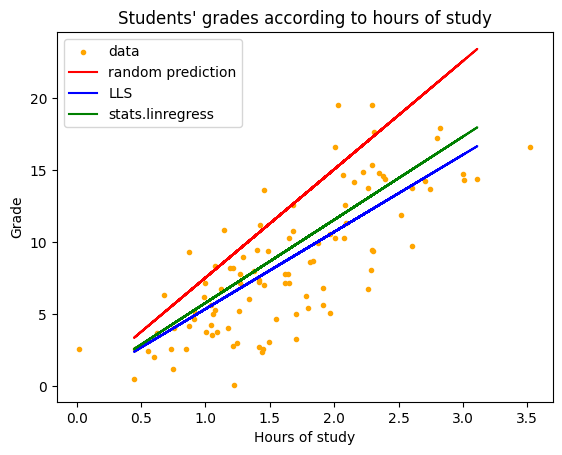

In [58]:
plt.scatter(study_hours, grade, c = 'orange', marker='.')
plt.plot(X_train, w_random * X_train, color='red')
plt.plot(X_train, w_LLS * X_train, color='blue')
plt.plot(X_train, w_stats * X_train, color='green')
plt.title('Students\' grades according to hours of study')
plt.xlabel('Hours of study')
plt.ylabel('Grade')
plt.legend(['data','random prediction','LLS','stats.linregress'])
plt.show()